<a href="https://colab.research.google.com/github/jcarlospj/mack/blob/main/Trilha1_LeiDeZipf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# Trilha 1 - Lei de Zipf
---





# **What Is a Lakehouse?** 

Fonte: https://databricks.com/blog/2020/01/30/what-is-a-data-lakehouse.html
de 30 de janeiro de 2020



---


Em minhas pesquisas sobre a Ciência de Dados, encontrei este artigo que achei muito interessante.

O texto aborda a arquitetura de gerenciamento de dados Lakehouse e suas vantagens com relação as arquiteturas anteriores: Data Warehouse e Data Lake, demonstrando a evolução dos processos e seus repositórios de informações ao longo da história.


## Aquisição dos Dados

In [ ]:
import requests
from bs4 import BeautifulSoup

texto = []
linhas = []

URL = "https://databricks.com/blog/2020/01/30/what-is-a-data-lakehouse.html"
page = requests.get(URL)
soup = BeautifulSoup(page.content, "html.parser")

#print(soup.prettify())

## Filtro, atribui somente a class blog-post:
linhas = soup.find_all(class_='blog-post--section blog-post--article text-longform')

## Lê as linhas e carrega o texto:
for i in linhas:
  texto.append(i.text)

for i in range(len(texto)):
    texto[i] = texto[i].lower() # para unicidade
    texto[i] = texto[i].replace('\n','')
    texto[i] = texto[i].replace('.','')
    texto[i] = texto[i].replace(',','')
    texto[i] = texto[i].replace('(','')
    texto[i] = texto[i].replace(')','')
    texto[i] = texto[i].replace('?','')
    texto[i] = texto[i].replace('\'','') # elimina ' e "

print(texto)


['over the past few years at databricks we’ve seen a new data management architecture that emerged independently across many customers and use cases: the lakehouse in this post we describe this new architecture and its advantages over previous approachesdata warehouses have a long history in decision support and business intelligence applications since its inception in the late 1980s data warehouse technology continued to evolve and mpp architectures led to systems that were able to handle larger data sizes but while warehouses were great for structured data a lot of modern enterprises have to deal with unstructured data semi-structured data and data with high variety velocity and volume data warehouses are not suited for many of these use cases and they are certainly not the most cost efficientas companies began to collect large amounts of data from many different sources architects began envisioning a single system to house data for many different analytic products and workloads abou

# Construção do Dicionário

In [ ]:
mydict = {}                             # crie um dicionário vazio

for line in texto:

  line = line.lower()                   # converte para lower
  words = line.split()                  # separa cada palavra
  count = 0                             # quantidade de palavras


  for word in words:                      # para cada palavra em words
    count = count + 1
    if word not in mydict.keys():         # se palavra não está no dicionário 
      mydict[word] = 1                    # acrescenta a word com o valor 1
    else:                                 # se a entrada já existe 
      mydict[word] =  mydict[word] + 1    # apenas soma 1 ao valor já existente

print(mydict)
print('Texto com: ' + str(count), 'palavras.')

{'over': 4, 'the': 42, 'past': 2, 'few': 1, 'years': 2, 'at': 2, 'databricks': 3, 'we’ve': 1, 'seen': 1, 'a': 35, 'new': 6, 'data': 77, 'management': 3, 'architecture': 4, 'that': 18, 'emerged': 1, 'independently': 1, 'across': 1, 'many': 13, 'customers': 1, 'and': 62, 'use': 7, 'cases:': 1, 'lakehouse': 17, 'in': 21, 'this': 5, 'post': 1, 'we': 1, 'describe': 1, 'its': 2, 'advantages': 1, 'previous': 1, 'approachesdata': 1, 'warehouses': 11, 'have': 12, 'long': 1, 'history': 1, 'decision': 2, 'support': 8, 'business': 1, 'intelligence': 1, 'applications': 6, 'since': 1, 'inception': 1, 'late': 1, '1980s': 1, 'warehouse': 3, 'technology': 2, 'continued': 1, 'to': 38, 'evolve': 1, 'mpp': 1, 'architectures': 2, 'led': 1, 'systems': 15, 'were': 2, 'able': 4, 'handle': 1, 'larger': 2, 'sizes': 2, 'but': 6, 'while': 4, 'great': 1, 'for': 30, 'structured': 3, 'lot': 1, 'of': 38, 'modern': 4, 'enterprises': 2, 'deal': 1, 'with': 5, 'unstructured': 4, 'semi-structured': 2, 'high': 1, 'variety'

# Exibição dos Resultados

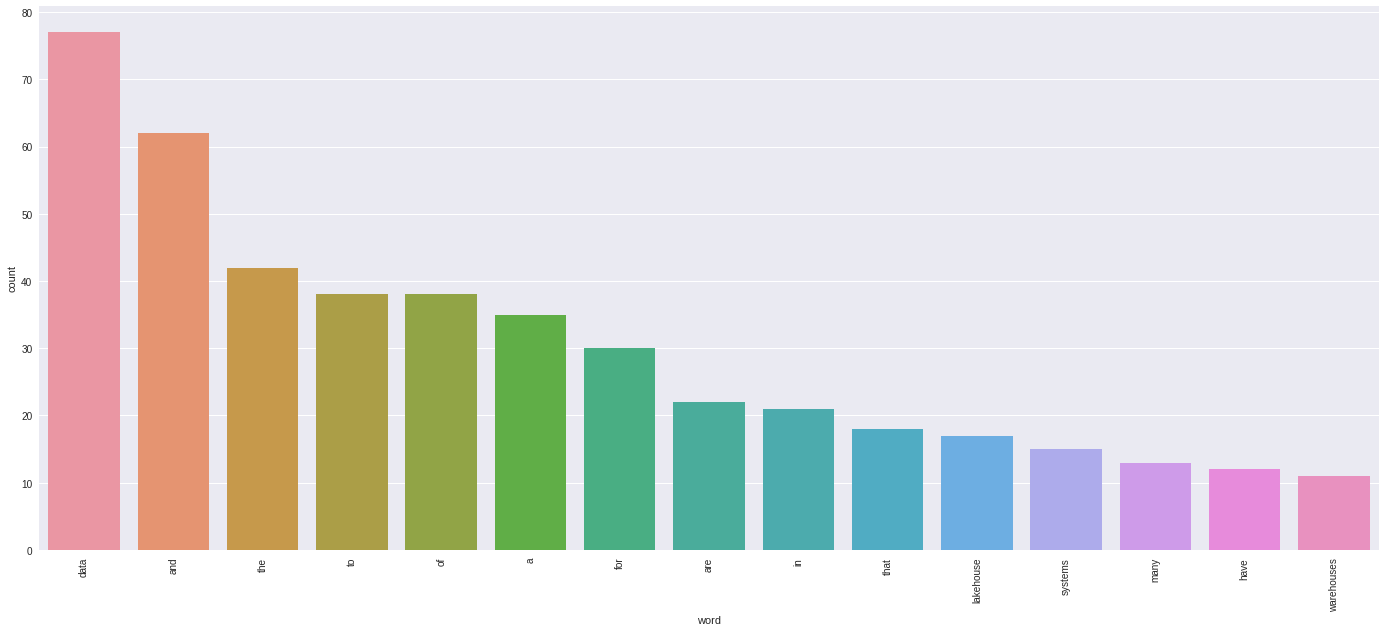

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.DataFrame(mydict.items(),  columns=['word', 'count']).sort_values('count',ascending=False)
df = df[df['count'] > 10] # somente termos com mais de 10 ocorrências
# df = df.iloc[ np.int(len(df)/2) - 10 : np.int(len(df)/2) + 10 ] # para livros ou textos com muitos termos limita a um número mínimo de termos

plt.figure(figsize=(24,10))
mpl.style.use(['seaborn'])
sns.barplot(x=df.word,y=df['count'])
plt.xticks(rotation=90) 

plt.show()

In [ ]:
new_dict = {}   # guarda as maiores ocorrências
ord = {}        # guarda na ordem decrescente

for k,v in mydict.items():
    if v > 10:
      new_dict[k] = v

ord = sorted(new_dict.items(), key=lambda kv: kv[1], reverse=True)

seq = 1
print('Seq.   Qtd   Palavra ')
for k,v in ord:
  if seq < 10:
    print(seq, 'º   ',v, '  ',k)
  else:
    print(seq, 'º  ',v, '  ',k)  
  seq += 1

Seq.   Qtd   Palavra 
1 º    77    data
2 º    62    and
3 º    42    the
4 º    38    to
5 º    38    of
6 º    35    a
7 º    30    for
8 º    22    are
9 º    21    in
10 º   18    that
11 º   17    lakehouse
12 º   15    systems
13 º   13    many
14 º   12    have
15 º   11    warehouses


# Conclusão

Conforme a Lei de Zipf, a amostra utilizada para estudo demostrou muitas ocorrências de preposições e artigos, contudo, a palavra com maior frenquência é **data**, encontrada 77 vezes no texto.

Ranking das principais palavras encontradas:

1ª data

11ª lakehouse

12ª systems

15ª warehouses



---
Compartilhado em: https://colab.research.google.com/drive/11kaSj9vLJQxEcP9O05e2SXXl4_3HObCx?usp=sharing
---